<a href="https://colab.research.google.com/github/hjoddi/REI201G-python-projects/blob/main/S13_HjorvarSigurdsson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stærðfræði og reiknifræði vor 2022, skiladæmi 13**

In [ ]:
# Import skipanir

import numpy as np
import pandas as pd
from scipy.cluster.vq import whiten, kmeans, vq
import numpy.random as npr
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, diff

##Verkefni VV5

In [ ]:
# 1

## Undirbúningur
npr.seed(23)
np.set_printoptions(precision=3, floatmode='fixed', suppress=True)

skrá = 'http://cs.hi.is/python/hiti-urkoma.txt'
vv5df = pd.read_csv(skrá, delimiter='   ', names=['ár','hiti','úrkoma'])
hitiArray = np.array(vv5df['hiti'])
úrkomaArray = np.array(vv5df['úrkoma'])
X = np.c_[hitiArray, úrkomaArray]
whiten(X)

## Flokkun
(cb, d) = kmeans(X, 4)
(code, dvec) = vq(X, cb)

## Útprentun
print('codebook = \n', cb)
print(f'markfall = {d:.3f}')
print(f'flokkun = {code}')
(x,y) = X.T
(mx,my) = cb.T
print()
print("Miðpunktar hópanna eru: (4.162, 996.200), (4.253, 861.973), (3.692, 551.408), (4.000, 694.581)")

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


codebook = 
 [[  4.162 996.200]
 [  4.253 861.973]
 [  3.692 551.408]
 [  4.000 694.581]]
markfall = 37.064
flokkun = [2 2 2 2 0 2 3 1 3 3 0 2 3 3 2 3 2 2 3 3 1 3 3 0 1 1 1 1 2 2 2 2 2 2 3 3 2
 2 3 3 0 1 0 0 0 2 2 2 2 2 2 2 3 3 1 1 2 1 0 1 3 2 1 3 3 3 1 1 3 1]

Miðpunktar hópanna eru: (4.162, 996.200), (4.253, 861.973), (3.692, 551.408), (4.000, 694.581)


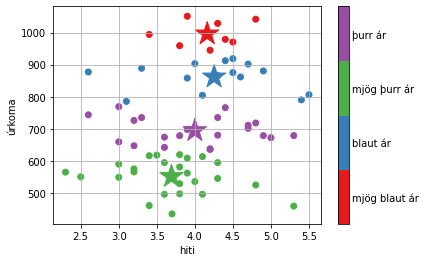

In [ ]:
# 2

def qcmap(n):
  import matplotlib.colors as clrs
  use_cmap = 'Set1' if n <= 9 else 'tab20'
  cmap = plt.get_cmap(use_cmap)(range(n))
  if n > 5: cmap[5] = [0.95, 0.75, 0, 1]
  return clrs.LinearSegmentedColormap.from_list("",cmap,n)

plt.scatter(x, y, c=code, cmap=qcmap(4))
plt.scatter(mx, my, s=600, c=[0,1,2,3], marker='*', cmap=qcmap(4))
plt.xlabel('hiti')
plt.ylabel('úrkoma')
plt.grid()
lbl = ['mjög blaut ár', 'blaut ár', 'mjög þurr ár', 'þurr ár']
cb = plt.colorbar(ticks=range(4))
cb.set_ticklabels(lbl)
cb.ax.tick_params(size=0)
plt.clim(-0.5,4-0.5)

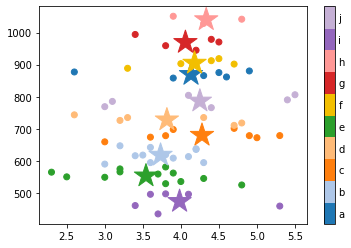

In [ ]:
# 3

## Flokkun
(cb, d) = kmeans(X, 10)
(code, dvec) = vq(X, cb)

## Teikning
(x,y) = X.T
(mx,my) = cb.T
plt.scatter(x, y, c=code, cmap=qcmap(10))
plt.scatter(mx, my, s=600, c=[0,1,2,3,4,5,6,7,8,9], marker='*', cmap=qcmap(10))
lbl = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
cb = plt.colorbar(ticks=range(10))
cb.set_ticklabels(lbl)
cb.ax.tick_params(size=0)
plt.clim(-0.5,10-0.5)

##Verkefni VV6 A

In [ ]:
# 1

def f(x,y):
  return x**2 * y + 2*x*y**2 - 3*x*y + 4

def stigullAlmennurPunktur():
  x, y, z = symbols('x y z', real=True)
  f = x**2 * y + 2*x*y**2 - 3*x*y + 4
  stigull = np.array([diff(f,x), diff(f,y)])

  return stigull

stigull = stigullAlmennurPunktur()
print(stigull)
print(stigull[0])
print(stigull[1])

def stigull(x,y):
  a = 2*x*y + 2*y**2 - 3*y
  b = x**2 + 4*x*y - 3*x

  return np.array([a, b])

print(stigull(1,1))

[2*x*y + 2*y**2 - 3*y x**2 + 4*x*y - 3*x]
2*x*y + 2*y**2 - 3*y
x**2 + 4*x*y - 3*x
[1 2]


In [ ]:
# 2 og 3

stgl = stigull(1,1)
u = np.array((-1,-1))
stefnuafleiða = stgl * u
print(stefnuafleiða)

stigullAfmæli = stigull(0,5)
uAfmæli = np.array((9,4))
stefuafleiðaAfmæli = stigullAfmæli * uAfmæli
print(stefuafleiðaAfmæli)

[-1 -2]
[315   0]


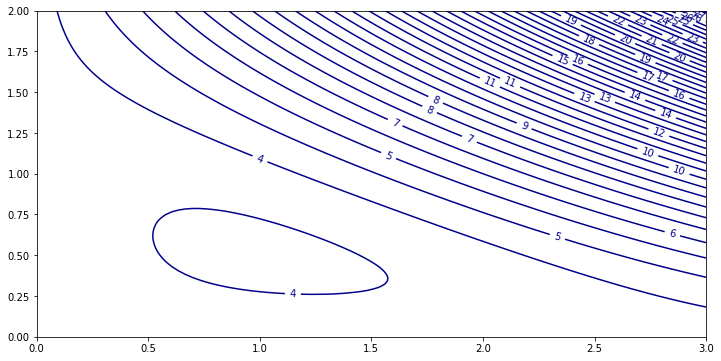

In [ ]:
# 4

plt.figure(figsize=(12,6))
x = np.linspace(0,3,100)
y = np.linspace(0,2,100)
z = np.array([[f(xi,yj) for xi in x] for yj in y])
c = plt.contour(x,y,z,40,colors='darkblue')
plt.clabel(c,fmt="%.0f");

##Verkefni VV6 B

In [ ]:
# 1

def næstum_eins(u,v):
  dist = np.linalg.norm(u-v)
  if (dist < 10E-8):
    return True
  else: 
    return False

print(næstum_eins(np.array((1,500)),np.array((2,6))))
print(næstum_eins(np.array((1,500)), np.array((1,500))))

False
True


In [ ]:
# 2

def í_plani(u,a,b):
  v = (a*u)*a + (b*u)*b
  return næstum_eins(u,v)

a = np.array([0.48, 0.64, 0.60])
b = np.array([0.8, -0.6, 0])

# a
ua = np.array([4,2,3])
print(í_plani(ua, a, b))

# b
ub = np.array([6,3,2])
print(í_plani(ub,a,b))

False
False
